# Linear Regression
Goal is to predict the value of a dependent (target) variable based on independent (predictor) variables. Linear regression model looks like this:

$$ \hat y = \hat w_{0} + \hat w_{1}x_{1} + \hat w_{2}x_{2} + ... + \hat w_{m}x_{m} $$

where the coefficients $\hat w_{0}$ is the bias and $\hat w_{1}, \hat w_{2} ..., \hat w_{m}$ are the estimated weights.

### Simple linear regression model - overview

Given data $x$ and $y$, we can plot a scatter chart such as for the following small dataset where $x$ is the year and $y$ is the revenue of a company:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    {'X': 2018, 'Y': 50},
    {'X': 2019, 'Y': 54},
    {'X': 2020, 'Y': 58},
    {'X': 2021, 'Y': 55},
    {'X': 2022, 'Y': 60},
]

df = pd.DataFrame(data)
print(df)

      X   Y
0  2018  50
1  2019  54
2  2020  58
3  2021  55
4  2022  60


![alt text](images/5.3%20Linear%20Regression.png 'Linear Regression')

The image above shows that the true value for $y$ under the assumptions of a linear relationship and the estimated value $\hat y$ are often different due to noise in the data, i.e., there will be a random error term $\epsilon$ such that:

$$y = w_{0} + w_{1}x + \epsilon$$

where the bias $w_{0}$ is the intercept and $w_{1}$ is the model slope. In a linear regression model, the best model is one that minimizes the error term values for each data point. So, we wish to find the coefficients which minimize this error. We can use the least squares method to do this.

Given $y_{i} = w_{0} + w_{1}x_{i} +\epsilon , i = 1 ... n$
$$\sum_{i=1}^{n}\epsilon^{2} = \sum_{i=1}^{n}(y_{i} - w_{0} - w_{1}x_{i})$$

and we can calculate the following:

$$\frac{\partial}{\partial w_{0}} \sum_{i=1}^{n}\epsilon^{2} = 0$$
and
$$\frac{\partial}{\partial w_{1}} \sum_{i=1}^{n}\epsilon^{2} = 0$$

Doing a whole bunch of tedious maths on these two terms leads to the following results:

$$w_{0} = \frac{1}{n}\sum_{i=1}^{n}y_{i} - w_{1}\frac{1}{n}\sum_{1=2}^{n}x_{i}$$
and
$$w_{1} = \frac{\sum_{i=1}^{n}y_{i}x_{i} - \frac{(\sum_{i=1}^{n}y_{i})(\sum_{i=1}^{n}x_{i})}{n} }{\sum_{i=1}^{n}x_{i}^{2} - \frac{(\sum_{i=1}^{n}x_i)^{2}}{n}}$$

Calculating each term individually is simple using the dataframe from earlier.

In [5]:
df['YX'] = df['Y']*df['X']
df['X2'] = df['X']*df['X']
print(df)

      X   Y      YX       X2
0  2018  50  100900  4072324
1  2019  54  109026  4076361
2  2020  58  117160  4080400
3  2021  55  111155  4084441
4  2022  60  121320  4088484


In [13]:
sum_yx = sum(df['YX'])
sumy_sumx = sum(df['X'])*sum(df['Y'])
sum_x2 = sum(df['X2'])
sum_x_2 = (sum(df['X']))*(sum(df['X']))

w1 = (sum_yx - (sumy_sumx / len(df.index))) / (sum_x2 - (sum_x_2 / len(df.index)))
print(w1)

2.1


In [14]:
w0 = sum(df['Y']) / (len(df.index)) - (w1/len(df.index))*sum(df['X'])
print(w0)

-4186.6


This means that we now have a linear equation as follows:

$\hat y = -4186.6 + 2.1\cdot x$

So, in 2024, the predicted revenue is 78.5 million dollars.
Of course, we also need to assess the performance and reliability of the linear regression model on unseen data using model validation techniques. It is possible to gain confidence in the ability to make accurate predictions.

## Simple Linear Regression - Details

Predict a quantitative response $Y$ on the basis of a single predictor $X$. Assume a linear relationship, written as:

$$ Y \approx \beta_{0} + \beta_{1}X $$

For example

$$ sales \approx \beta_{0} + \beta_{1} \times TV $$

can be used to regress TV advertising on sales of a product and see the relationship between them.

However, we can only estimate the true values, so we write

$$ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x $$

where $\hat{y}$ is a prediction of $Y$ on the basis that $X=x$. The true values of $\beta_{0}$ and $\beta_{1}$ are unknown, so we estimate them under the condition that we want the above equation to be as close as possible to the true values. This closeness can be measured with the least squares approach.

If our linear model is $ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x $ then we have **residuals** for each data point given by

$$ e_{i} = y_{i} - \hat{y_{i}} $$

which is the difference between the observed value of the dependent variable and the value of the dependent variable predicted by the model. We can then define a residual sum of squares as:

$$ RSS = e_{1}^{2} + e_{2}^{2} + ... e_{n}^{2} $$

or

$$ RSS = (y_{1} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{1})^{2} + (y_{2} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{2})^{2} + ... + (y_{n} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{n})^{2} $$

Minimizing this with calculus, we find:

$$\hat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2} $$
and
$$ \hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x} $$

Let's take a look at the advertising and sales data below:

In [6]:
import pandas as pd
df = pd.read_csv('Data/advertising.csv')
print(df.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['TV']] # Note that X is 2D
y = df['sales']

model = LinearRegression()
model.fit(X, y)
print(f"Intercept (beta0): {model.intercept_}")
print(f"Slope (beta1): {model.coef_[0]}")

# Predict sales based on the model
df['predicted_sales'] = model.predict(X)

Intercept (beta0): 7.032593549127689
Slope (beta1): 0.047536640433019785


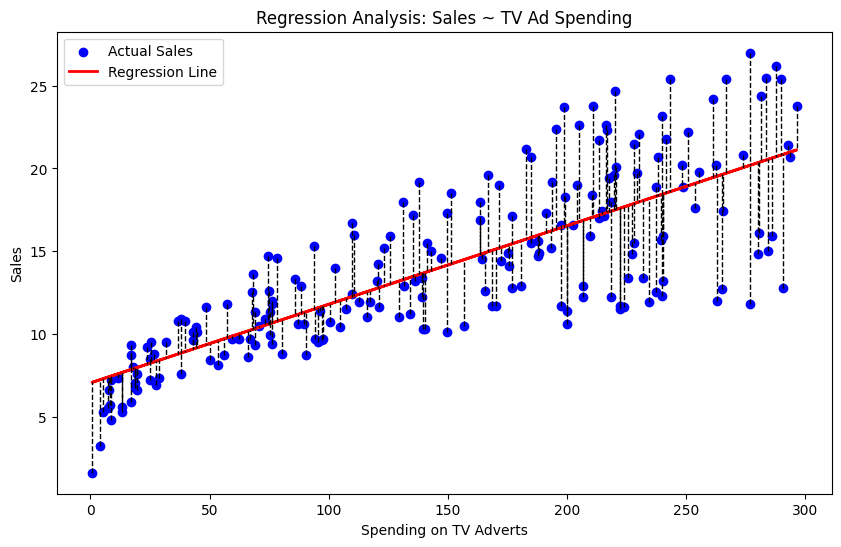

In [11]:
# Plot the regression line and the residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['sales'], color='blue', label='Actual Sales')
plt.plot(df['TV'], df['predicted_sales'], color='red', linewidth=2, label='Regression Line')

# For adding lines to represent residuals
for i in range(len(df)):
    plt.plot([df['TV'][i], df['TV'][i]], [df['sales'][i], df['predicted_sales'][i]], 'k--', lw=1)

plt.xlabel('Spending on TV Adverts')
plt.ylabel('Sales')
plt.title('Regression Analysis: Sales ~ TV Ad Spending')
plt.legend()
plt.show()

**No package** Having used a package to do the regression, let us now calculate the coefficients without the help of a package to demonstrate how it is done. To calculate the coefficients we essentially need to program the following:

$$\hat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2} $$
and
$$ \hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x} $$

In [14]:
df2 = pd.read_csv('Data/advertising.csv')

# Step 1: Calculate the means of TV and sales
x_mean = df['TV'].mean()
y_mean = df['sales'].mean()

# Step 2: Calculate beta1 (slope)
numerator = ((df['TV'] - x_mean) * (df['sales'] - y_mean)).sum()
denominator = ((df['TV'] - x_mean) ** 2).sum()
beta1 = numerator / denominator

# Step 3: Calculate beta0 (intercept)
beta0 = y_mean - beta1 * x_mean

print(f"Calculated Slope (beta1): {beta1}")
print(f"Calculated Intercept (beta0): {beta0}")

Calculated Slope (beta1): 0.047536640433019736
Calculated Intercept (beta0): 7.0325935491276965


### Linear Algebra Approach to Linear Regression

Some calculations may be made easier by taking a linear algebra approach to dealing with the data. In general, if we have a lot of data, we can approximate $Y$ as a linear function of $X$ like so

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$$
where $\theta_{i}$'s are the weights or parameters ($\beta$'s earlier) and $h(x)$ is the predicted value of $y$. If we let $x_{0} = 1$ be the intercept term, then we can write this as a matrix transformation:

$$h(x) = \sum_{i=0}^{n}\theta_{i}x_{i} = \theta^{T}x$$

Now we can define a **cost function** which is essentially our residual sum of squares from earlier:

$$J(\theta) = \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

where the superscript $i$ represents the $i$ th data point. We want to write this cost function in terms of matrices and vectors.



But first, let's look at these equations in more detail to see precisely what is going on because they are a little opaque as they stand.

Imagine we have three data points in the following table
| | $x_{0}$ | $x_{1}$ | $x_{2}$ |
|---|---|---|---|
| $h(x^{(1)})$ | $x_{0}^{(1)}$ | $x_{1}^{(1)}$ | $x_{2}^{(1)}$ |
| $h(x^{(2)})$ | $x_{0}^{(2)}$ | $x_{1}^{(2)}$ | $x_{2}^{(2)}$ |
| $h(x^{(3)})$ | $x_{0}^{(3)}$ | $x_{1}^{(3)}$ | $x_{2}^{(3)}$ |

The superscripts refer to the data points and the subscripts the independent variables, while $h$ is the prediction of $Y$ based on the model.

We can see that $h(x^{(1)}) = \theta_{0}x_{0}^{(1)} + \theta_{1}x_{1}^{(1)} + \theta_{2}x_{2}^{(1)}$, remembering that $x_{0}=1$ so that $\theta_{0}$ is the intercept. This can be written as:

$$h(x^{(1)}) = \begin{pmatrix} \theta_{0} \theta_{1} \theta_{2} \end{pmatrix} \begin{pmatrix} x_{0}^{(1)} \\ x_{1}^{(1)} \\ x_{1}^{(1)} \end{pmatrix} = \theta^{T} \vec{x^{(1)}}$$

where we have used the convention that horizontal vectors are the vectors transposed.


Using this convention, we can also create a *design matrix* X as follows for n data points, i.e., n-rows of data:

$$X = \begin{pmatrix} -(x^{(1)})^{T}- \\ -(x^{(2)})^{T}- \\ \vdots  \\ -(x^{(n)})^{T}- \end{pmatrix}$$

and let $\hat{y}$ be the $n$-dimensional vector containing all the observed values:

$$\hat{y} = \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)} \end{pmatrix} $$

Looking back at our three data points as a specific example from earlier, we can relate $X$ and $h(x)$ like so:

$$\begin{pmatrix} h(x^{(1)}) \\ h(x^{(2)}) \\ h(x^{(3)}) \end{pmatrix} = \begin{pmatrix} x_{0}^{(1)} x_{1}^{(1)} x_{2}^{(1)} \\ x_{0}^{(2)} x_{1}^{(2)} x_{2}^{(2)} \\ x_{0}^{(3)} x_{1}^{(3)} x_{2}^{(3)} \end{pmatrix} \begin{pmatrix} \theta_{0} \\ \theta_{1} \\ \theta_{2} \end{pmatrix} $$

which is essentially like writing

$$h(x) = X^{T}\theta$$
notice that the $\theta$ and the $x$ are switched around here.

Now we can focus on the linear algebra more concretely and less opaquely.

Let's write the following for n data points:

$$X\theta - \vec{y} = \begin{pmatrix} (x^{(1)})^T\theta \\ \vdots \\ (x^{(n)})^T\theta \end{pmatrix} - \begin{pmatrix} y^{(1)} \\ \vdots \\ y^{(n)} \end{pmatrix}$$

If we multiply the left size by $(X\theta - \vec{y})^{T}$, and we use the fact that $z^{T}z = \sum_{i}z_{i}^{2}$, then we find

$$\frac{1}{2}(x\theta - \vec{y})^{T}(x\theta - \vec{y}) = \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^2 = J(\theta)$$

In other words, our cost function is now written in terms of matrices and vectors, allowing us to do a little bit of linear algebra. Since we wish to minimize the cost function (residual sum or squares for linear regression), then we should differentiate with respect to theta. Since this is multivariate we use the nabla operator:

$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2}\vec\nabla_{\theta} (x\theta - \vec{y})^{T}(x\theta - \vec{y})$$

Multiply out the matrices on the right hand side

$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2}\vec\nabla_{\theta} [ (X\theta)^{T}(X\theta) - (X\theta)^{T}\vec{y} - \vec{y}^{T}(X\theta) + \vec{y}^{T}\vec{y} ]$$

The first term on the RHS can be written as $\theta^{T}(X^{T}X)\theta$, and the second term as $\vec{y}^{T}(X\theta)$, giving us:

$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2}\vec\nabla_{\theta} [ \theta^{T}(X^{T}X)\theta - 2\vec{y}^{T}(X\theta) +  \vec{y}^{T}\vec{y}] $$

Now, for the first term on the RHS we can use the fact that, for a symmetric matrix $A$, $\vec{\nabla_{x}}x^{T}Ax = 2Ax$, and for the second term we can use the fact that $\vec{\nabla_{x}}b^{T}x = b$, so we get
$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2} [ 2X^{T}X\theta - 2X^{T}\vec{y}] $$

or
$$\vec\nabla_{\theta}J(\theta) =  X^{T}X\theta - X^{T}\vec{y} $$

In order to minimize the parameters, we should set this differential to zero, namely:
$$X^{T}X\theta = X^{T}\vec{y} $$

and rearranging gives us the **normal equations**
$$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$$

This means that we can now use matrix operations to calculate the coefficients, which we will try here:

In [15]:
import pandas as pd
import numpy as np

# Load in the data
df = pd.read_csv('Data/advertising.csv')

# Step 1: Prepare the data matrix X and vector y
# X should have an intercept (column of ones) and the TV column

X = np.c_[np.ones(df.shape[0]), df['TV']]
y = df['sales'].values

# Step 2: Calculate X^T * X
X_transpose = X.T
X_transpose_X = X_transpose.dot(X)

# Step 3: Calculate (X^T * X)^-1
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# Step 4: Calculate X^T y
X_transpose_y = X_transpose.dot(y)

# Step 5: Calculate the coefficients theta
theta = X_transpose_X_inv.dot(X_transpose_y)

# Output the coefficients
beta0 = theta[0] # intercept
beta1 = theta[1] # slope
print(f"Calculated intercept (beta0): {beta0}")
print(f"Calculated slope (beta1): {beta1}")

Calculated intercept (beta0): 7.032593549127724
Calculated slope (beta1): 0.04753664043301957


### Summary
So far, we have looked at three ways of calculating the coefficients
1. We have used a package in python to do it for us
2. We have used basic calculus in one dimension
3. We have used linear algebra with matrix calculus.

Calculated intercept (beta0): 7.032593549127724

Calculated slope (beta1): 0.04753664043301957

All three methods yielded exactly the same result (because they are all essentially the same method, and likely the package uses matrix calculus), but linear algebra makes the calculations much easier when it comes to multilinear regression later 😀. Seeing how it works under the hood makes it much easier to understand what is going on.

### How accurate are the coefficient estimates?

Remember that these calculations are just estimates. Under assumptions of linearity, the true relationship is $Y = \beta_{0} + \beta_{1} + \epsilon$, which is a **population regression line**. The estimates characterize the **least squares line**. The true relationship is generally not known and not observed in real world data. This is synonymous with statistical approaches in which we sample from a population and are interested in the population mean $\mu$ but must make do with estimating it with the mean of the sample data $\hat{\mu}$.

$\beta_{0}$ is the expected value of $Y$ when $X=0$ and $\beta_{1}$ is the average increase in $Y$ after a one-unit increase in $X$.

In the above approximations, with $\beta_{0} = 7.032593549127724$ and $\beta_{1} = 0.04753664043301957$ we can say that if we spend an extra $1000 on advertising, we will sell an extra 47.5 items

The $\epsilon$ term captures error related to:
- measurement error
- faulty assumptions about linearity
- other missing variables in the model
- we assume $\epsilon$ is independent of X.

We can start to answer the question about accuracy by continuing the parallel with sampling a random variable. If we are interested in the mean of a sample, we can ask how the estimated mean value changes with a different sample set. In taking new samples from the same population, we get new estimates of the mean. All these estimates vary slightly. One estimated mean value may over-estimate the true value, another may under-estimate the true value. But, over a huge number of these observations, the average of all the estimates of the mean should converge towards to the true value of the mean. If the estimated mean values do this, then they each represent an *unbiased estimator* of the true mean, i.e., we say that the estimated mean value is an *unbiased estimator*.

In fact, the estimates of the intercept and slope in simple linear regression are also *unbiased estimators* of the true intercept and slope. In other words, if we took a lot of data and calculated coefficients for all the data sets, the average of the coefficients would converge towards the true values of the coefficients.

Let's simulate this idea with data:

Step 1: Imagine that the true distribution is given by $Y = 2 + 3X + \epsilon$.

Step 2: Let $\epsilon$ be generated from a normal distribution with mean zero.

Step 3: Create 100 random $X$ values and generate 100 corresponding $Y$ values from the true distribution model in step 1.

Step 4: Plot a least squares regression line for this data set.

Step 5: Repeat the above four steps multiple times to show that each time, the regression line will be slightly different.

[2.18534245 2.73228047]
[1.73503359 3.42430598]
[2.09702287 3.08879872]
[2.08118197 2.95903814]
[2.35910728 2.61556793]
[1.81597682 3.30361839]
[2.17551124 2.65579744]
[1.95871435 3.0277295 ]
[2.11148218 2.9363253 ]
[2.08356117 2.81648261]


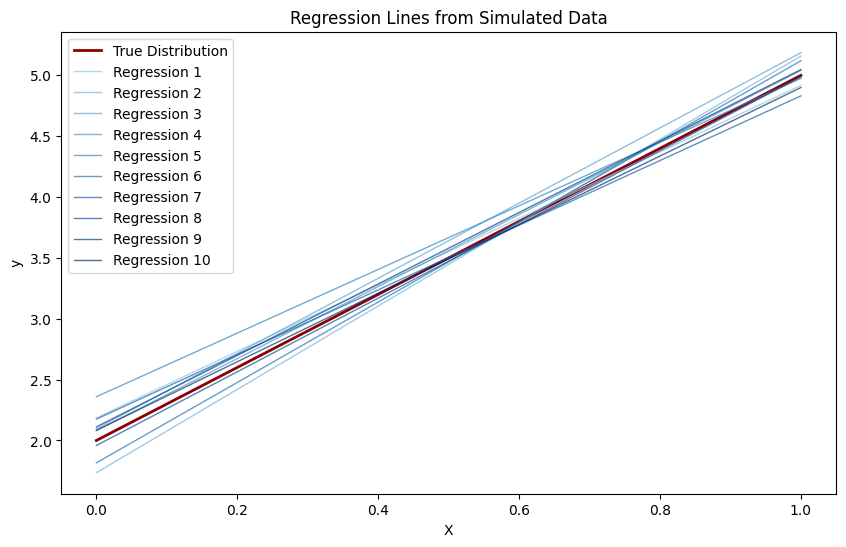

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Function to generate random data
def generate_data(n_points=100):
    X = np.random.uniform(0, 1, n_points) # 100 random values between 0 and 1
    epsilon = np.random.normal(0, 1, n_points) # 100 normal random values, mean 0, std 1
    y = 2 + 3*X + epsilon # True distribution
    return X, y

# Step 2: Regression fitting function taken from matrix calculus approach above
def linear_regression(X, y):
    # Step 2.1: Prepare the design matrix
    # X should have an intercept (column of ones) and the TV column
    X_design = np.c_[np.ones((X.shape[0], 1)), X]

    # Step 2.2: Calculate X^T * X
    X_transpose = X_design.T
    X_transpose_X = X_transpose.dot(X_design)

    # Step 2.3: Calculate (X^T * X)^-1
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)

    # Step 2.4: Calculate X^T y
    X_transpose_y = X_transpose.dot(y)

    # Step 2.5: Calculate the coefficients theta
    theta = X_transpose_X_inv.dot(X_transpose_y)
    return theta

# Step 3: Simulation and plotting
n_simulations = 10
colors = plt.cm.Blues(np.linspace(0.4, 1, n_simulations)) # Different shades of blue

plt.figure(figsize=(10, 6))

# Plot the true regression line in dark red
X_range = np.linspace(0, 1, 100)
true_line = 2 + 3*X_range
plt.plot(X_range, true_line, color="darkred", linewidth=2, label='True Distribution')

# Run the simulations
for i in range(n_simulations):
    X, y = generate_data()
    theta = linear_regression(X, y)
    print(theta)
    beta0, beta1 = theta[0], theta[1]

    # Plotting the fitted regression line
    plt.plot(X_range, beta0 + beta1 * X_range, color=colors[i], linewidth=1, linestyle='-', alpha=0.7, label=f'Regression {i+1}')

# Step 4: Finalize the plot
plt.title('Regression Lines from Simulated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Summary of Discussion on Accuracy of Coefficients
So, we can see that the coefficients vary depending on the data that we have. Above, data was generated with random noise so that we could simulate retrieving samples from the true population, and linear regression was performed on this data, leading to different values of the coefficients.

### Quantifying the Accuracy of the Coefficients